# WeatherPy
----

## Analysis
----

#### General comments
* We are only studying data that exists in cities, which means our data are biased toward places that humans have decided to settle, which might remove some extreme values from our sample.
* Though little data exists for cities below the negative-40 latitude (due to a higher concentration of habitable landmass at higher latitudes), the regression lines make it possible to predict what those values might be.
* It would be interesting to re-run this analysis during different parts of the calendar year. Would any of the regression lines be steeper in July -- when parts of one hemisphere is in the dead of summer, and parts of the other hemisphere are in the dead of winter -- compared to April?
* Just as we have split the data into hemispheres, it would also be interesting to re-run this analysis on tropical zones and tepid zones.
* General questison: how do weather systems moving through the globe affect the shape of regression lines? Do these systems tend to recur at predictable intervals?


#### Observation 1: Max temperatures increase near the equator
* The regression lines show stronger correlation between a city's latitude and its maximum temperature than any other observed metric.
* As a city is closer to the equator, its max temperature tends to be higher. This trend hold across both northern and southern hemispheres.

#### Observation 2: Humidity and cloudiness increase with latitude
* The regression lines consistently show slight positive correlation between a city's latitude and its percentages of humidity and cloudiness.
* As a city is further north, its humidity and cloudiness increase. This trend is barely visible when simply viewing the data as a whole, and becomes somewhat more apparent when calculating hemispheric regression lines.

#### Observation 3: Wind speed is difficult to predict
* The regression lines inconsistently show correlation between a city's latitude and its wind speed.
* For cities in the northern hemisphere, as a city is further north, its wind speed usually inreases a little bit.
* For cities in the southern hemisphere, different samples have shown different trends (sometimes increasing toward the equator, sometimes decreasing).

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Ensure there are at least 500 cities to look for
enough_cities = "no"
while enough_cities == "no":

    # Create a set of random lat and lng combinations
    lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
    lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
    lat_lngs = zip(lats, lngs)

    # Identify nearest city for each lat, lng combination
    for lat_lng in lat_lngs:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
        # If the city is unique, then add it to a our cities list
        if city not in cities:
            cities.append(city)

    print(len(cities))
    
    # Check the city count to confirm sufficient count
    if len(cities) >= 500:
        enough_cities = "yes"
        

602


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Documentation on units: https://openweathermap.org/weather-data

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Build container variables for storing weather data
city_name = []
city_cloudiness = []
city_country = []
city_date = []
city_humidity = []
city_lat = []
city_lng = []
city_max_temp = []
city_wind_speed = []

# Store loop counting variables
city_count = 1
set_count = 1

In [4]:
# Use a loop to search for data on every city
for x in cities:
    
    # Create variables for storing the data
    response = requests.get(query_url + x)
    response_json = response.json()
    
    # Log current record attempt
    print(f"Processing Record {city_count} of Set {set_count} | {x}")
    
    # Log data in "sets" of 50
    if city_count % 50 == 0:
        city_count = 1
        set_count += 1
    else:
        city_count +=1
    
    # Anticipate data collection errors and build multiple series of data points if successful
    try:
        city_cloudiness.append(response_json['clouds']['all'])
        city_country.append(response_json['sys']['country'])
        city_date.append(response_json['dt'])
        city_humidity.append(response_json['main']['humidity'])
        city_lat.append(response_json['coord']['lat'])
        city_lng.append(response_json['coord']['lon'])
        city_max_temp.append(response_json['main']['temp_max'])
        city_wind_speed.append(response_json['wind']['speed'])
        
        # Even though we alraedy have the city names as "cities", we only want to use the ones with data
        city_name.append(x)
        
    except:
        
        # Makes a note if data was not found in OpenWeather for a particular city
        print("City not found. Skipping...")
        pass

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | ondangwa
Processing Record 3 of Set 1 | alice springs
Processing Record 4 of Set 1 | ostersund
Processing Record 5 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 6 of Set 1 | airai
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | norman wells
Processing Record 9 of Set 1 | domoni
Processing Record 10 of Set 1 | la ronge
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | jurm
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | khaniotis
Processing Record 15 of Set 1 | tarko-sale
Processing Record 16 of Set 1 | cairns
Processing Record 17 of Set 1 | aksu
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | dukat
Processing Record 21 of Set 1 | narsaq
Processing Record 22 of Set 1 | hobart
Processing Record 23 of Set 1 | chokurdakh
Processing Record 24 of Set 1 | cidreira
Proc

Processing Record 40 of Set 4 | mandalgovi
Processing Record 41 of Set 4 | salalah
Processing Record 42 of Set 4 | nemuro
Processing Record 43 of Set 4 | balabac
Processing Record 44 of Set 4 | cabaiguan
Processing Record 45 of Set 4 | sol-iletsk
Processing Record 46 of Set 4 | east london
Processing Record 47 of Set 4 | kharan
Processing Record 48 of Set 4 | ca mau
Processing Record 49 of Set 4 | jinchang
Processing Record 50 of Set 4 | khorinsk
Processing Record 1 of Set 5 | huarmey
Processing Record 2 of Set 5 | bitung
Processing Record 3 of Set 5 | lichinga
Processing Record 4 of Set 5 | sao felix do xingu
Processing Record 5 of Set 5 | pasighat
Processing Record 6 of Set 5 | loa janan
Processing Record 7 of Set 5 | berbera
Processing Record 8 of Set 5 | cayenne
Processing Record 9 of Set 5 | totness
Processing Record 10 of Set 5 | batangafo
Processing Record 11 of Set 5 | saskylakh
Processing Record 12 of Set 5 | yingcheng
Processing Record 13 of Set 5 | san patricio
Processing Re

Processing Record 30 of Set 8 | baena
Processing Record 31 of Set 8 | lasa
Processing Record 32 of Set 8 | bat yam
Processing Record 33 of Set 8 | chara
Processing Record 34 of Set 8 | katherine
Processing Record 35 of Set 8 | provideniya
Processing Record 36 of Set 8 | koumac
Processing Record 37 of Set 8 | nisia floresta
Processing Record 38 of Set 8 | atasu
Processing Record 39 of Set 8 | catalao
Processing Record 40 of Set 8 | oussouye
Processing Record 41 of Set 8 | karakol
Processing Record 42 of Set 8 | mehamn
Processing Record 43 of Set 8 | vostok
Processing Record 44 of Set 8 | yarada
Processing Record 45 of Set 8 | abu dhabi
Processing Record 46 of Set 8 | mago
Processing Record 47 of Set 8 | jiquipilas
Processing Record 48 of Set 8 | mackenzie
Processing Record 49 of Set 8 | longlac
City not found. Skipping...
Processing Record 50 of Set 8 | tiznit
Processing Record 1 of Set 9 | high level
Processing Record 2 of Set 9 | labuhan
Processing Record 3 of Set 9 | majene
Processin

Processing Record 16 of Set 12 | awjilah
Processing Record 17 of Set 12 | nabire
Processing Record 18 of Set 12 | gat
Processing Record 19 of Set 12 | namatanai
Processing Record 20 of Set 12 | masandra
City not found. Skipping...
Processing Record 21 of Set 12 | ruidoso
Processing Record 22 of Set 12 | morococha
Processing Record 23 of Set 12 | haibowan
City not found. Skipping...
Processing Record 24 of Set 12 | botou
Processing Record 25 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 26 of Set 12 | grafton
Processing Record 27 of Set 12 | ribeira grande
Processing Record 28 of Set 12 | krasnogorodsk
Processing Record 29 of Set 12 | isla mujeres
Processing Record 30 of Set 12 | bambous virieux
Processing Record 31 of Set 12 | fethiye
Processing Record 32 of Set 12 | port blair
Processing Record 33 of Set 12 | malwan
City not found. Skipping...
Processing Record 34 of Set 12 | palmer
Processing Record 35 of Set 12 | huilong
Processing Record 36 of Set 12 | mali

In [5]:
# Create a dictionary to store the collected weather data
weather_dict = {
    "City": city_name,
    "Cloudiness": city_cloudiness,
    "Country": city_country,
    "Date": city_date,
    "Humidity": city_humidity,
    "Lat": city_lat,
    "Lng": city_lng,
    "Max Temp": city_max_temp,
    "Wind Speed": city_wind_speed
}

# Store the weather data in a DataFrame
weather_data = pd.DataFrame(weather_dict)


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Export to csv
weather_data.to_csv("Output/weather_data.csv")

In [7]:
# Print the DataFrame header
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ushuaia,75,AR,1585844700,50,-54.80,-68.30,57.20,19.46
1,ondangwa,100,NA,1585845117,40,-17.92,15.95,89.60,3.36
2,alice springs,75,AU,1585845099,54,-23.70,133.88,80.60,18.34
3,ostersund,90,SE,1585845227,92,63.18,14.64,28.40,23.04
4,airai,64,TL,1585844746,72,-8.93,125.41,61.56,1.57


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [8]:
# Get current time to print in plot titles
time_label = time.strftime("%Y-%m-%d")

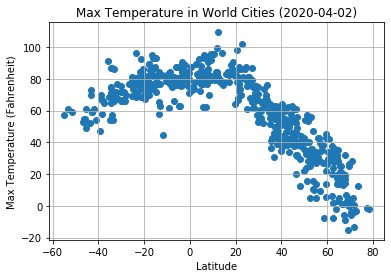

In [9]:
# Build a scatter plot for each data type
plt.scatter(city_lat, city_max_temp, marker="o")

# Incorporate the other graph properties
plt.title("Max Temperature in World Cities (" + time_label + ")")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

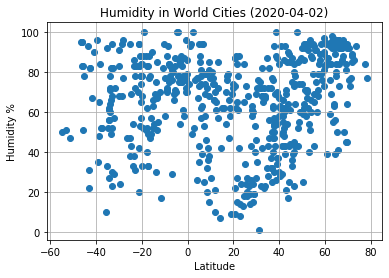

In [10]:
# Build a scatter plot for each data type
plt.scatter(city_lat, city_humidity, marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities (" + time_label + ")")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/HumidityInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

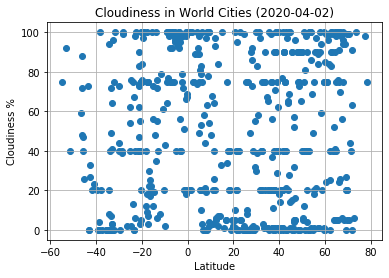

In [11]:
# Build a scatter plot for each data type
plt.scatter(city_lat, city_cloudiness, marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities (" + time_label + ")")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/CloudinessInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

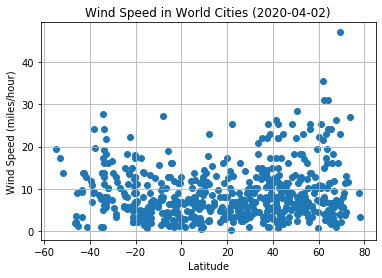

In [12]:
# Build a scatter plot for each data type
plt.scatter(city_lat, city_wind_speed, marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities (" + time_label + ")")
plt.ylabel("Wind Speed (miles/hour)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/WindSpeedInWorldCities.png")

# Show plot
plt.show()

## Linear Regression

In [13]:
# Create a function to calculate and plot regression data
def lingressplot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-squared is: {rvalue**2}")
    print(f"The formula for the regression line is: {line_eq}.")

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_data[(weather_data.Lat >= 0)]
southern_df = weather_data[(weather_data.Lat < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8253553184009171
The formula for the regression line is: y = -1.23x +98.79.


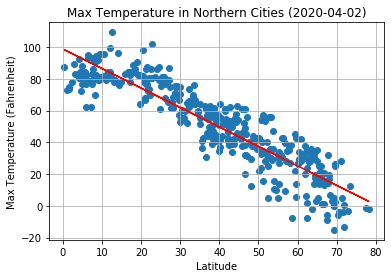

In [15]:
# Build a scatter plot for each data type
plt.scatter(northern_df.Lat, northern_df["Max Temp"], marker="o")

# Run the regression plotting function
lingressplot(northern_df.Lat,northern_df["Max Temp"])

# Incorporate the other graph properties
plt.title("Max Temperature in Northern Cities (" + time_label + ")")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/TemperatureInNorthernCities.png")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3567722434333225
The formula for the regression line is: y = 0.45x +83.85.


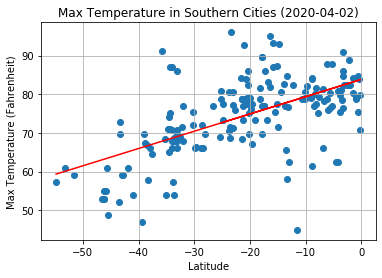

In [16]:
# Build a scatter plot for each data type
plt.scatter(southern_df.Lat, southern_df["Max Temp"], marker="o")

# Run the regression plotting function
lingressplot(southern_df.Lat,southern_df["Max Temp"])

# Incorporate the other graph properties
plt.title("Max Temperature in Southern Cities (" + time_label + ")")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/TemperatureInSouthernCities.png")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11244722232903463
The formula for the regression line is: y = 0.4x +48.22.


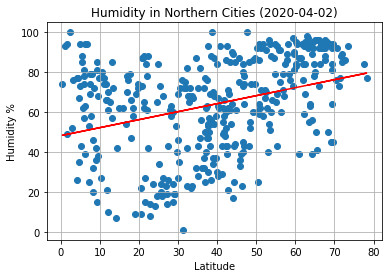

In [17]:
# Build a scatter plot for each data type
plt.scatter(northern_df.Lat, northern_df.Humidity, marker="o")

# Run the regression plotting function
lingressplot(northern_df.Lat,northern_df.Humidity)

# Incorporate the other graph properties
plt.title("Humidity in Northern Cities (" + time_label + ")")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/HumidityInNorthernCities.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.042506667609329266
The formula for the regression line is: y = 0.31x +74.67.


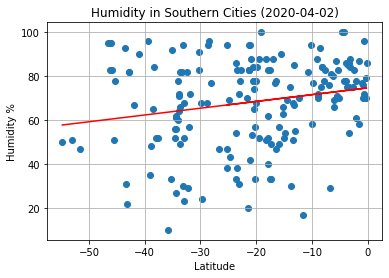

In [18]:
# Build a scatter plot for each data type
plt.scatter(southern_df.Lat, southern_df.Humidity, marker="o")

# Run the regression plotting function
lingressplot(southern_df.Lat,southern_df.Humidity)

# Incorporate the other graph properties
plt.title("Humidity in Southern Cities (" + time_label + ")")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/HumidityInSouthernCities.png")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0165288272391735
The formula for the regression line is: y = 0.25x +37.26.


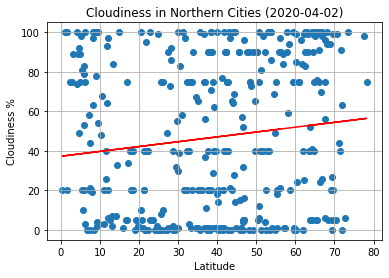

In [19]:
# Build a scatter plot for each data type
plt.scatter(northern_df.Lat, northern_df.Cloudiness, marker="o")

# Run the regression plotting function
lingressplot(northern_df.Lat,northern_df.Cloudiness)

# Incorporate the other graph properties
plt.title("Cloudiness in Northern Cities (" + time_label + ")")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/CloudinessInNorthernCities.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.15836726627776354
The formula for the regression line is: y = 1.07x +75.03.


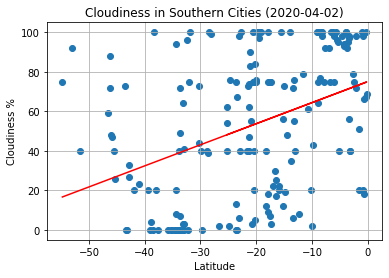

In [20]:
# Build a scatter plot for each data type
plt.scatter(southern_df.Lat, southern_df.Cloudiness, marker="o")

# Run the regression plotting function
lingressplot(southern_df.Lat,southern_df.Cloudiness)

# Incorporate the other graph properties
plt.title("Cloudiness in Southern Cities (" + time_label + ")")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/CloudinessInSouthernCities.png")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04998078948691283
The formula for the regression line is: y = 0.07x +6.32.


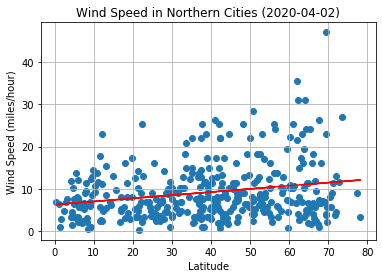

In [21]:
# Build a scatter plot for each data type
plt.scatter(northern_df.Lat, northern_df["Wind Speed"], marker="o")

# Run the regression plotting function
lingressplot(northern_df.Lat,northern_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("Wind Speed in Northern Cities (" + time_label + ")")
plt.ylabel("Wind Speed (miles/hour)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/WindSpeedInNorthernCities.png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.057771139373462996
The formula for the regression line is: y = -0.1x +6.45.


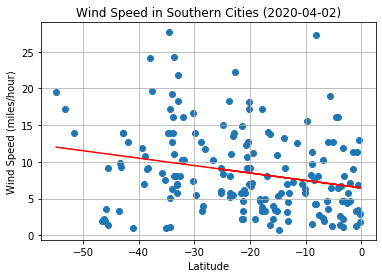

In [22]:
# Build a scatter plot for each data type
plt.scatter(southern_df.Lat, southern_df["Wind Speed"], marker="o")

# Run the regression plotting function
lingressplot(southern_df.Lat,southern_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("Wind Speed in Southern Cities (" + time_label + ")")
plt.ylabel("Wind Speed (miles/hour)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/WindSpeedInSouthernCities.png")

# Show plot
plt.show()